In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import itertools
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier

In [2]:
class_mapping = {0: 'M0000', 1: 'M2503', 2: 'M2508'}

In [3]:
def evaluation_metrics(Y_test, preds):
    # Creating a confusion matrix
    cm = confusion_matrix(Y_test, preds)

    # Printing the classification report
    print(classification_report(Y_test, preds))

    # Printing the F1 Score
    print("F1 Score: ", f1_score(Y_test, preds, average='weighted'))
    
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
    plt.title('Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    

In [4]:
# Reading Train Datasets
df_M0000=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df_M0000['target'] = 0
df_M2503=pd.read_csv(r'E:\Havelsan\Datasets\M2503_train_sensors.csv', engine='c')
df_M2503['target'] = 1
df_M2508=pd.read_csv(r'E:\Havelsan\Datasets\M2508_train_sensors.csv', engine='c')
df_M2508['target'] = 2
df1 = pd.concat([df_M0000,df_M2503,df_M2508], axis=0)
df1

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear,target
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1410,0
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1409,0
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1408,0
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1407,0
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,12.9311,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1406,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706371,00:22:12,FAU,SW28,WC6,35,12.4602,25.1648,2757.11,12.3641,2.87130,...,16.0775,6,15.7389,31.6045,0.0,1.0,0.0,0.0,4,2
706372,00:22:13,FAU,SW28,WC6,35,12.4691,25.1000,2757.11,12.3815,2.87130,...,16.0790,6,15.7460,31.6222,0.0,1.0,0.0,0.0,3,2
706373,00:22:14,FAU,SW28,WC6,35,12.4781,25.0352,2757.11,12.3989,2.87130,...,16.0804,6,15.7530,31.6398,0.0,1.0,0.0,0.0,2,2
706374,00:22:15,FAU,SW28,WC6,35,12.4870,24.9703,2757.11,12.4163,2.87130,...,16.0819,6,15.7601,31.6574,0.0,1.0,0.0,0.0,1,2


In [5]:
# Reading Test Datasets
df_M0000=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
df_M0000['target'] = 0
df_M2503=pd.read_csv(r'E:\Havelsan\Datasets\M2503_test_sensors.csv', engine='c')
df_M2503['target'] = 1
df_M2508=pd.read_csv(r'E:\Havelsan\Datasets\M2508_test_sensors.csv', engine='c')
df_M2508['target'] = 2
df2 = pd.concat([df_M0000,df_M2503,df_M2508], axis=0)
df2

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear,target
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1413,0
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1412,0
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1411,0
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1410,0
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,0,14.9813,22.5320,0.0,0.0,0.0,0.0,1409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363102,00:21:11,FAU,SW28,WC6,53,12.2713,24.8041,2854.77,11.3117,2.84142,...,16.2002,6,15.8048,32.3668,0.0,1.0,0.0,0.0,4,2
363103,00:21:12,FAU,SW28,WC6,53,12.2393,24.7914,2854.77,11.1414,2.83280,...,16.1980,6,15.8072,32.1289,0.0,1.0,0.0,0.0,3,2
363104,00:21:13,FAU,SW28,WC6,53,12.2073,24.7788,2854.77,10.9711,2.82417,...,16.1958,6,15.8096,31.8910,0.0,1.0,0.0,0.0,2,2
363105,00:21:14,FAU,SW28,WC6,53,12.4152,24.9221,2854.77,12.1801,2.86838,...,16.1937,6,15.8288,31.8499,0.0,1.0,0.0,0.0,1,2


# SeaTeamp

In [6]:
WindSpeed='WC0'
Load='FAU'
df_temp=df1[df1['WindSpeed']==WindSpeed]
df_temp=df_temp[df_temp['Load']==Load]
result=df_temp
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_train=result[abr_sensor_list+['target','SeaTemp']]
df_train.dropna(inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp
0,14.09040,266.6760,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
1,14.09040,266.6760,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
2,13.97260,347.2700,0.000,13.73900,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,303.516,-1.81976,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0,SW20
3,13.98190,341.6110,225.204,13.74950,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,303.529,-1.82216,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0,SW20
4,13.99120,335.9520,450.408,13.76000,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,303.541,-1.82455,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0,SW20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372796,9.77781,25.4163,3113.630,9.90936,2.47518,3.46382,2.16511,70.5840,7.81052,2.13454,...,366.531,-47.43190,57.6036,51.0311,299.667,15.8659,16.9155,30.2040,2,SW28
372797,9.15424,25.3470,3113.690,9.34368,2.37044,3.46398,2.01608,70.0969,7.83669,2.13460,...,366.464,-47.47190,57.6075,51.0336,299.685,15.8701,17.0480,30.1501,2,SW28
372798,8.53067,25.2776,3113.760,8.77800,2.26570,3.46414,1.86704,69.6098,7.86287,2.13466,...,366.398,-47.51200,57.6114,51.0361,299.702,15.8743,17.1805,30.0963,2,SW28
372799,7.90710,25.2082,3113.820,8.21232,2.16096,3.46431,1.71800,69.1226,7.88904,2.13472,...,366.331,-47.55210,57.6152,51.0386,299.720,15.8784,17.3129,30.0424,2,SW28


In [7]:
df_train.isna().sum()

E02005     0
E02006     0
E02056     0
E03760     0
G00027     0
G00108     0
G02011     0
N02015     0
P00023     0
P01005     0
P01302     0
P01303     0
P01600     0
P01602     0
P02055     0
P02065     0
P02066     0
P02071     0
P02072     0
Q02004     0
T00002     0
T01010     0
T01011     0
T01350     0
T01351     0
T01601     0
T01603     0
T02014     0
T02040     0
T02041     0
T02042     0
T02044     0
T04600     0
Z00518     0
Z01970     0
Z02013     0
target     0
SeaTemp    0
dtype: int64

In [8]:
WindSpeed='WC0'
Load='FAU'
df_temp=df2[df2['WindSpeed']==WindSpeed]
df_temp=df_temp[df_temp['Load']==Load]
result=df_temp
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_test=result[abr_sensor_list+['target','SeaTemp']]
df_test.dropna(inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp
0,14.09040,266.6760,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
1,14.09040,266.6760,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
2,14.09040,266.6760,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
3,14.09040,266.6760,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
4,14.09040,266.6760,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,SW20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192082,8.76714,25.3651,3085.57,9.53325,2.34586,3.42505,2.34586,70.2318,7.81190,2.14992,...,356.603,-45.71100,57.3358,49.9625,296.597,15.7353,16.1005,30.2530,2,SW28
192083,7.43266,25.2318,3085.57,8.44995,2.13871,3.42549,2.13871,69.2918,7.85575,2.15015,...,356.122,-45.45480,57.3362,49.9678,296.620,15.7480,16.1800,30.1769,2,SW28
192084,6.09819,25.0985,3085.57,7.36664,1.93155,3.42593,1.93155,68.3519,7.89959,2.15037,...,355.642,-45.19860,57.3365,49.9732,296.642,15.7607,16.2595,30.1008,2,SW28
192085,4.76372,24.9651,3085.57,6.28333,1.72440,3.42637,1.72440,67.4119,7.94344,2.15059,...,355.162,-44.94240,57.3369,49.9785,296.665,15.7734,16.3390,30.0248,2,SW28


In [9]:
df_test.isna().sum()

E02005     0
E02006     0
E02056     0
E03760     0
G00027     0
G00108     0
G02011     0
N02015     0
P00023     0
P01005     0
P01302     0
P01303     0
P01600     0
P01602     0
P02055     0
P02065     0
P02066     0
P02071     0
P02072     0
Q02004     0
T00002     0
T01010     0
T01011     0
T01350     0
T01351     0
T01601     0
T01603     0
T02014     0
T02040     0
T02041     0
T02042     0
T02044     0
T04600     0
Z00518     0
Z01970     0
Z02013     0
target     0
SeaTemp    0
dtype: int64

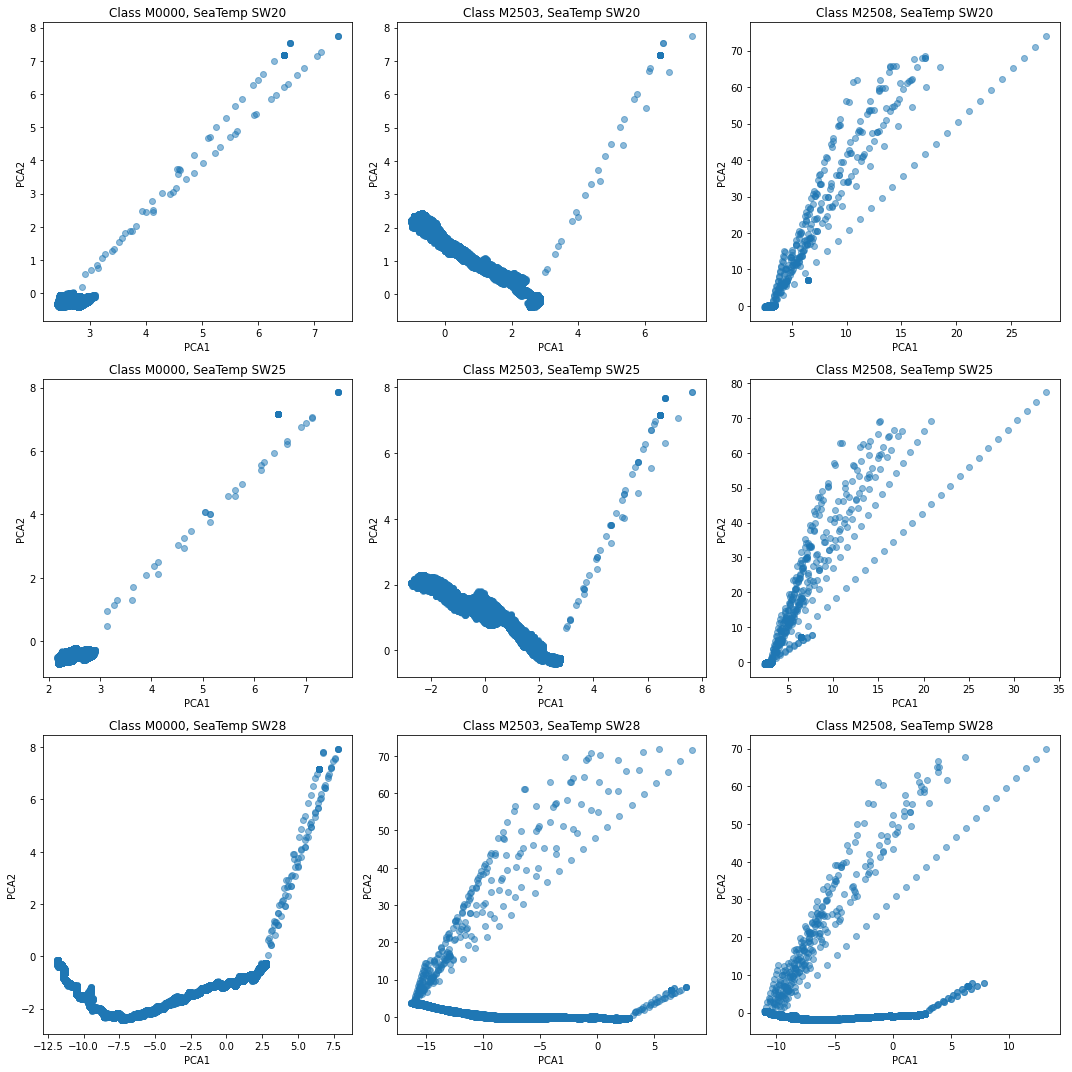

In [10]:
X = df_train[abr_sensor_list]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Add the class labels and temperature to the DataFrame
df_pca['target'] = df_train['target']
df_pca['SeaTemp'] = df_train['SeaTemp']
# assuming your DataFrame is called df and the class column is 'class_label', tempeture column is 'tempeture'
class_labels = df_train['target'].unique()
temp_values = df_train['SeaTemp'].unique()

# Create a subplot for each combination of class label and temperature
fig_count = 1
plt.figure(figsize=(15,15))
for temp in temp_values:
    for label in class_labels:
        plt.subplot(3,3,fig_count)
        temp_class_df = df_pca[(df_pca['target'] == label) & (df_pca['SeaTemp'] == temp)]
        plt.scatter(temp_class_df['PCA1'], temp_class_df['PCA2'], alpha=0.5)
        plt.title(f'Class {class_mapping.get(label)}, SeaTemp {temp}')
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        fig_count += 1
plt.tight_layout()
plt.show()


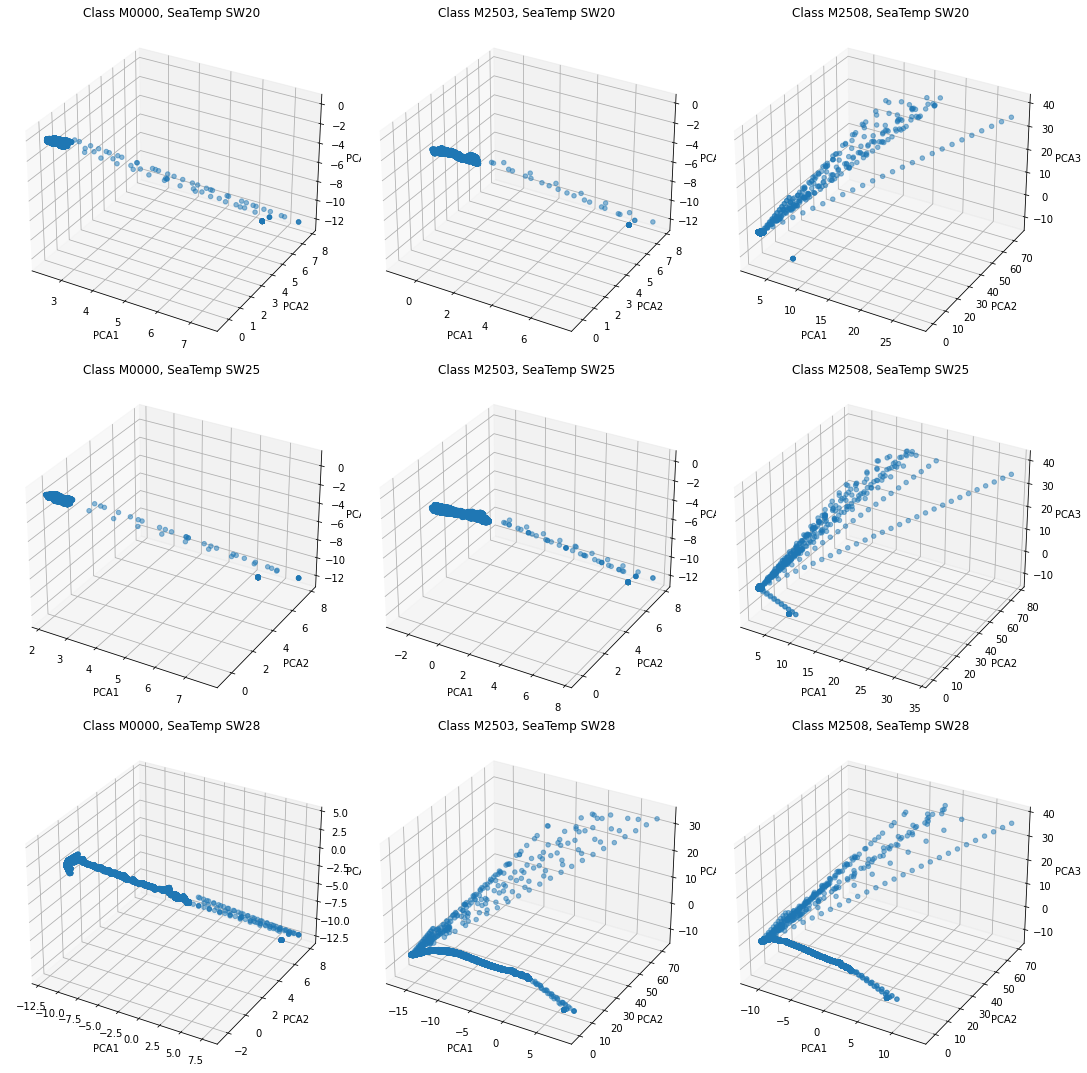

In [11]:
# Define the features
X = df_train[abr_sensor_list]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=3)

# Fit and transform the data to PCA
X_pca = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Add the class labels and wind speed to the DataFrame
df_pca['target'] = df_train['target']
df_pca['SeaTemp'] = df_train['SeaTemp']

# Create a figure for the plots
fig = plt.figure(figsize=(15,15))

# For each combination of class and wind speed, create a new 3D subplot
for i, (temp, label) in enumerate(itertools.product(temp_values, class_labels)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    temp_class_df = df_pca[(df_pca['target'] == label) & (df_pca['SeaTemp'] == temp)]
    ax.scatter(temp_class_df['PCA1'], temp_class_df['PCA2'], temp_class_df['PCA3'], alpha=0.5)
    ax.set_title(f'Class {class_mapping.get(label)}, SeaTemp {temp}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()


**One-Hot Encoder**

In [12]:
df_train_dummy = pd.get_dummies(df_train, columns=['SeaTemp'])
df_test_dummy  = pd.get_dummies(df_test, columns=['SeaTemp'])

In [13]:
df_train_dummy

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp_SW20,SeaTemp_SW25,SeaTemp_SW28
0,14.09040,266.6760,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,1,0,0
1,14.09040,266.6760,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,1,0,0
2,13.97260,347.2700,0.000,13.73900,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0,1,0,0
3,13.98190,341.6110,225.204,13.74950,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0,1,0,0
4,13.99120,335.9520,450.408,13.76000,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372796,9.77781,25.4163,3113.630,9.90936,2.47518,3.46382,2.16511,70.5840,7.81052,2.13454,...,57.6036,51.0311,299.667,15.8659,16.9155,30.2040,2,0,0,1
372797,9.15424,25.3470,3113.690,9.34368,2.37044,3.46398,2.01608,70.0969,7.83669,2.13460,...,57.6075,51.0336,299.685,15.8701,17.0480,30.1501,2,0,0,1
372798,8.53067,25.2776,3113.760,8.77800,2.26570,3.46414,1.86704,69.6098,7.86287,2.13466,...,57.6114,51.0361,299.702,15.8743,17.1805,30.0963,2,0,0,1
372799,7.90710,25.2082,3113.820,8.21232,2.16096,3.46431,1.71800,69.1226,7.88904,2.13472,...,57.6152,51.0386,299.720,15.8784,17.3129,30.0424,2,0,0,1


In [14]:
# Train split
X_train = df_train_dummy.drop('target', axis = 1) # Features
Y_train = df_train_dummy['target']  # Target

In [15]:
# Test split
X_test = df_test_dummy.drop('target', axis = 1) # Features
Y_test = df_test_dummy['target']  # Target

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 95.25


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     66504
           1       0.95      0.95      0.95     65005
           2       0.96      0.96      0.96     60578

    accuracy                           0.95    192087
   macro avg       0.95      0.95      0.95    192087
weighted avg       0.95      0.95      0.95    192087

F1 Score:  0.952487386557422


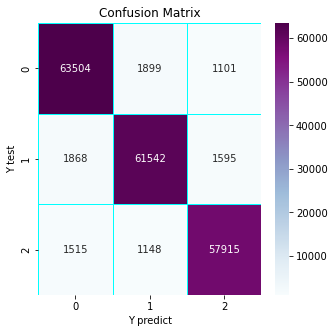

In [18]:
evaluation_metrics(Y_test, preds)

**Frequency Encoding**

In [19]:
df_train_frequency=df_train.copy()
fe = df_train_frequency.groupby('SeaTemp').size()/len(df_train_frequency)
df_train_frequency.loc[:, 'SeaTemp'] = df_train_frequency['SeaTemp'].map(fe)
df_test_frequency=df_test.copy()
fe = df_test_frequency.groupby('SeaTemp').size()/len(df_test_frequency)
df_test_frequency.loc[:, 'SeaTemp'] = df_test_frequency['SeaTemp'].map(fe)

In [20]:
df_train_frequency

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp
0,14.09040,266.6760,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,0.326273
1,14.09040,266.6760,0.000,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,0.326273
2,13.97260,347.2700,0.000,13.73900,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,303.516,-1.81976,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0,0.326273
3,13.98190,341.6110,225.204,13.74950,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,303.529,-1.82216,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0,0.326273
4,13.99120,335.9520,450.408,13.76000,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,303.541,-1.82455,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0,0.326273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372796,9.77781,25.4163,3113.630,9.90936,2.47518,3.46382,2.16511,70.5840,7.81052,2.13454,...,366.531,-47.43190,57.6036,51.0311,299.667,15.8659,16.9155,30.2040,2,0.342091
372797,9.15424,25.3470,3113.690,9.34368,2.37044,3.46398,2.01608,70.0969,7.83669,2.13460,...,366.464,-47.47190,57.6075,51.0336,299.685,15.8701,17.0480,30.1501,2,0.342091
372798,8.53067,25.2776,3113.760,8.77800,2.26570,3.46414,1.86704,69.6098,7.86287,2.13466,...,366.398,-47.51200,57.6114,51.0361,299.702,15.8743,17.1805,30.0963,2,0.342091
372799,7.90710,25.2082,3113.820,8.21232,2.16096,3.46431,1.71800,69.1226,7.88904,2.13472,...,366.331,-47.55210,57.6152,51.0386,299.720,15.8784,17.3129,30.0424,2,0.342091


In [21]:
# Train split
X_train = df_train_frequency.drop('target', axis = 1) # Features
Y_train = df_train_frequency['target']  # Target

In [22]:
# Test split
X_test = df_test_frequency.drop('target', axis = 1) # Features
Y_test = df_test_frequency['target']  # Target

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 95.27


              precision    recall  f1-score   support

           0       0.95      0.96      0.95     66504
           1       0.95      0.95      0.95     65005
           2       0.96      0.96      0.96     60578

    accuracy                           0.95    192087
   macro avg       0.95      0.95      0.95    192087
weighted avg       0.95      0.95      0.95    192087

F1 Score:  0.9526712893949469


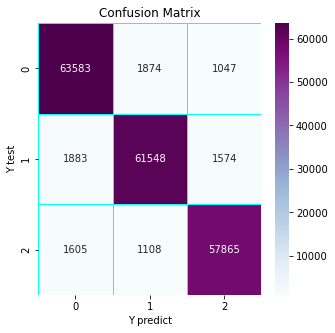

In [25]:
evaluation_metrics(Y_test, preds)

# WindSpeed

In [26]:
SeaTemp='SW20'
Load='FAU'
df_temp=df1[df1['SeaTemp']==SeaTemp]
df_temp=df_temp[df_temp['Load']==Load]
result=df_temp
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_train=result[abr_sensor_list+['target','WindSpeed']]
df_train.dropna(inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,WindSpeed
0,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
1,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
2,13.9726,347.270,0.000,13.7390,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,303.516,-1.81976,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0,WC0
3,13.9819,341.611,225.204,13.7495,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,303.529,-1.82216,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0,WC0
4,13.9912,335.952,450.408,13.7600,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,303.541,-1.82455,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0,WC0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366272,12.7897,253.470,3105.430,16.0417,2.73791,3.41227,2.89771,72.5311,7.66219,2.15258,...,272.943,-51.68550,46.4059,48.0435,231.990,13.0067,15.2950,23.4420,2,WC6
366273,12.1476,253.960,3090.310,16.0198,2.65590,3.40689,2.83852,72.3623,7.67131,2.15252,...,272.955,-51.77500,46.3962,48.0437,232.069,13.0147,15.3024,23.2679,2,WC6
366274,11.5056,254.449,3075.190,15.9978,2.57389,3.40151,2.77934,72.1935,7.68043,2.15246,...,272.967,-51.86450,46.3865,48.0439,232.149,13.0227,15.3098,23.0939,2,WC6
366275,10.8636,254.938,3060.080,15.9759,2.49188,3.39612,2.72016,72.0247,7.68955,2.15240,...,272.979,-51.95400,46.3767,48.0441,232.228,13.0306,15.3173,22.9198,2,WC6


In [27]:
df_train.isna().sum()

E02005       0
E02006       0
E02056       0
E03760       0
G00027       0
G00108       0
G02011       0
N02015       0
P00023       0
P01005       0
P01302       0
P01303       0
P01600       0
P01602       0
P02055       0
P02065       0
P02066       0
P02071       0
P02072       0
Q02004       0
T00002       0
T01010       0
T01011       0
T01350       0
T01351       0
T01601       0
T01603       0
T02014       0
T02040       0
T02041       0
T02042       0
T02044       0
T04600       0
Z00518       0
Z01970       0
Z02013       0
target       0
WindSpeed    0
dtype: int64

In [28]:
SeaTemp='SW20'
Load='FAU'
df_temp=df2[df2['SeaTemp']==SeaTemp]
df_temp=df_temp[df_temp['Load']==Load]
result=df_temp
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_test=result[abr_sensor_list+['target','WindSpeed']]
df_test.dropna(inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,WindSpeed
0,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
1,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
2,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
3,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
4,14.09040,266.676,0.00,13.87410,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,WC0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189122,7.66289,308.554,2122.15,9.95819,1.96300,3.31096,1.96951,68.5232,7.90606,2.14547,...,270.144,-52.53680,46.7563,48.0985,232.760,13.0291,13.3673,21.8868,2,WC6
189123,6.46779,307.106,1995.36,8.98998,1.82118,3.29588,1.82606,67.7324,7.93611,2.14528,...,269.726,-52.49700,46.7585,48.0978,232.770,13.0303,13.0845,21.8061,2,WC6
189124,5.27269,305.659,1868.57,8.02177,1.67936,3.28080,1.68262,66.9415,7.96615,2.14510,...,269.309,-52.45730,46.7606,48.0972,232.780,13.0316,12.8017,21.7253,2,WC6
189125,4.07759,304.211,1741.78,7.05356,1.53755,3.26572,1.53917,66.1507,7.99620,2.14491,...,268.891,-52.41760,46.7628,48.0965,232.790,13.0329,12.5188,21.6446,2,WC6


In [29]:
df_test.isna().sum()

E02005       0
E02006       0
E02056       0
E03760       0
G00027       0
G00108       0
G02011       0
N02015       0
P00023       0
P01005       0
P01302       0
P01303       0
P01600       0
P01602       0
P02055       0
P02065       0
P02066       0
P02071       0
P02072       0
Q02004       0
T00002       0
T01010       0
T01011       0
T01350       0
T01351       0
T01601       0
T01603       0
T02014       0
T02040       0
T02041       0
T02042       0
T02044       0
T04600       0
Z00518       0
Z01970       0
Z02013       0
target       0
WindSpeed    0
dtype: int64

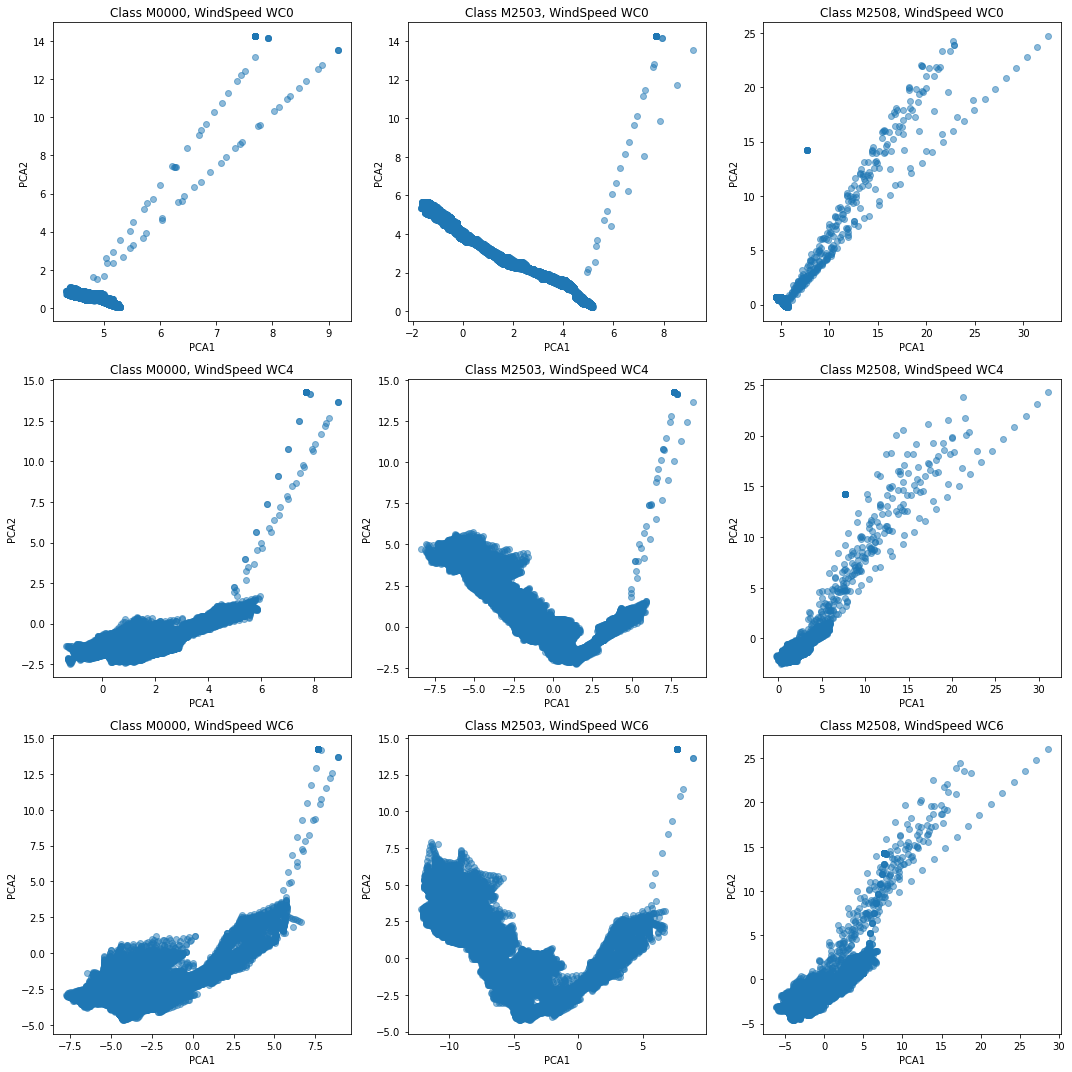

In [30]:
X = df_train[abr_sensor_list]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Add the class labels and temperature to the DataFrame
df_pca['target'] = df_train['target']
df_pca['WindSpeed'] = df_train['WindSpeed']
# assuming your DataFrame is called df and the class column is 'class_label', tempeture column is 'tempeture'
class_labels = df_train['target'].unique()
temp_values = df_train['WindSpeed'].unique()

# Create a subplot for each combination of class label and temperature
fig_count = 1
plt.figure(figsize=(15,15))
for temp in temp_values:
    for label in class_labels:
        plt.subplot(3,3,fig_count)
        temp_class_df = df_pca[(df_pca['target'] == label) & (df_pca['WindSpeed'] == temp)]
        plt.scatter(temp_class_df['PCA1'], temp_class_df['PCA2'], alpha=0.5)
        plt.title(f'Class {class_mapping.get(label)}, WindSpeed {temp}')
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        fig_count += 1
plt.tight_layout()
plt.show()


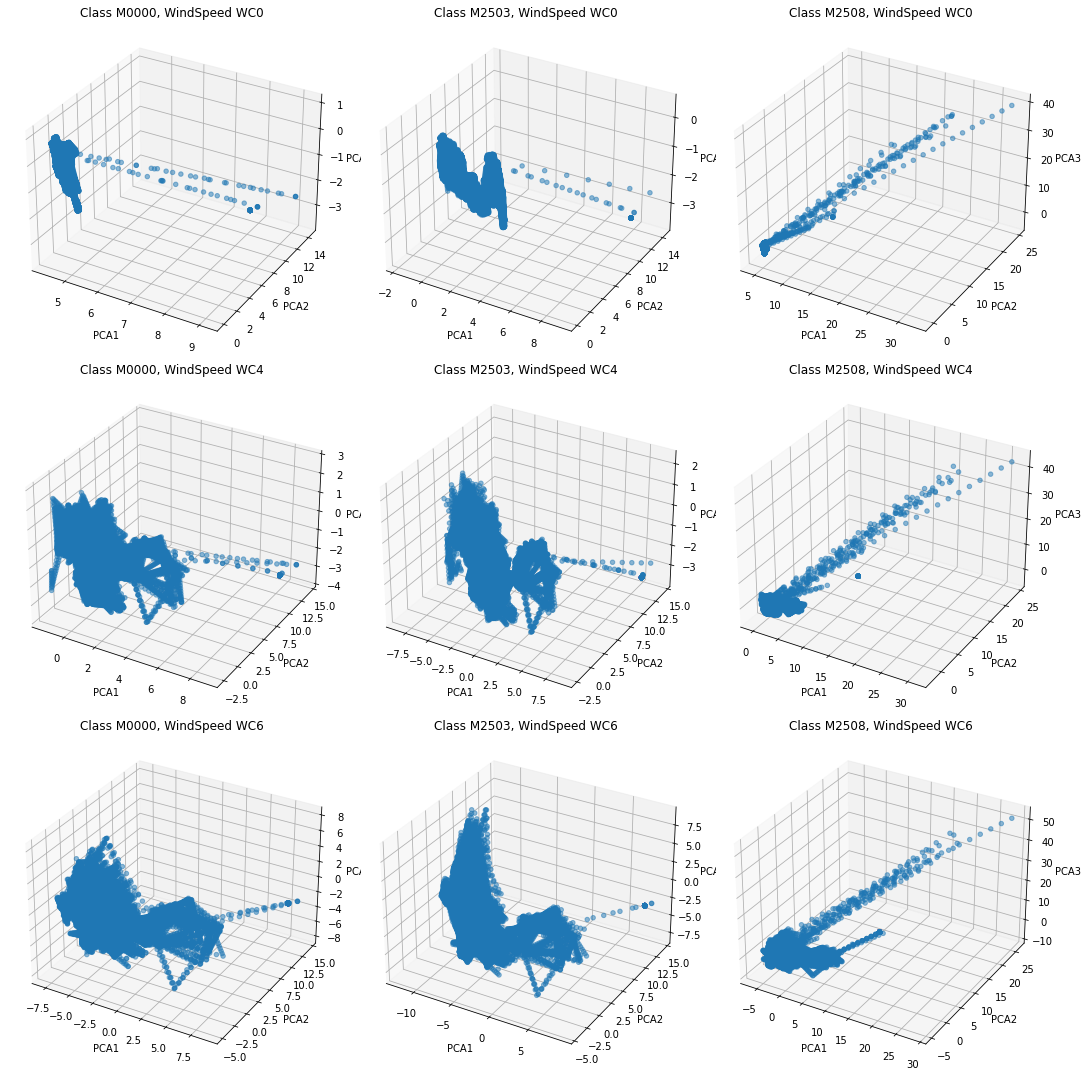

In [31]:
# Define the features
X = df_train[abr_sensor_list]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=3)

# Fit and transform the data to PCA
X_pca = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Add the class labels and wind speed to the DataFrame
df_pca['target'] = df_train['target']
df_pca['WindSpeed'] = df_train['WindSpeed']

# Create a figure for the plots
fig = plt.figure(figsize=(15,15))

# For each combination of class and wind speed, create a new 3D subplot
for i, (temp, label) in enumerate(itertools.product(temp_values, class_labels)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    temp_class_df = df_pca[(df_pca['target'] == label) & (df_pca['WindSpeed'] == temp)]
    ax.scatter(temp_class_df['PCA1'], temp_class_df['PCA2'], temp_class_df['PCA3'], alpha=0.5)
    ax.set_title(f'Class {class_mapping.get(label)}, WindSpeed {temp}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()


**One-Hot Encoder**

In [32]:
df_train_dummy = pd.get_dummies(df_train, columns=['WindSpeed'])
df_test_dummy = pd.get_dummies(df_test, columns=['WindSpeed'])

In [33]:
df_train_dummy

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,WindSpeed_WC0,WindSpeed_WC4,WindSpeed_WC6
0,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,1,0,0
1,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,1,0,0
2,13.9726,347.270,0.000,13.7390,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0,1,0,0
3,13.9819,341.611,225.204,13.7495,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0,1,0,0
4,13.9912,335.952,450.408,13.7600,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366272,12.7897,253.470,3105.430,16.0417,2.73791,3.41227,2.89771,72.5311,7.66219,2.15258,...,46.4059,48.0435,231.990,13.0067,15.2950,23.4420,2,0,0,1
366273,12.1476,253.960,3090.310,16.0198,2.65590,3.40689,2.83852,72.3623,7.67131,2.15252,...,46.3962,48.0437,232.069,13.0147,15.3024,23.2679,2,0,0,1
366274,11.5056,254.449,3075.190,15.9978,2.57389,3.40151,2.77934,72.1935,7.68043,2.15246,...,46.3865,48.0439,232.149,13.0227,15.3098,23.0939,2,0,0,1
366275,10.8636,254.938,3060.080,15.9759,2.49188,3.39612,2.72016,72.0247,7.68955,2.15240,...,46.3767,48.0441,232.228,13.0306,15.3173,22.9198,2,0,0,1


In [34]:
# Train split
X_train = df_train_dummy.drop('target', axis = 1) # Features
Y_train = df_train_dummy['target']  # Target

In [35]:
# Test split
X_test = df_test_dummy.drop('target', axis = 1) # Features
Y_test = df_test_dummy['target']  # Target

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 94.90


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     66300
           1       0.95      0.95      0.95     66442
           2       0.95      0.94      0.95     56385

    accuracy                           0.95    189127
   macro avg       0.95      0.95      0.95    189127
weighted avg       0.95      0.95      0.95    189127

F1 Score:  0.9489617564640541


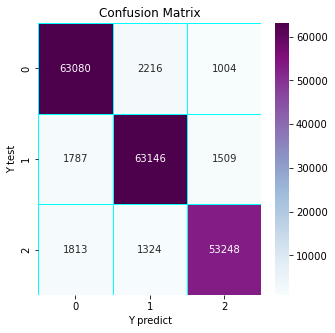

In [38]:
evaluation_metrics(Y_test, preds)

**Frequency Encoding**

In [39]:
df_train_frequency=df_train.copy()
fe = df_train_frequency.groupby('WindSpeed').size()/len(df_train_frequency)
df_train_frequency.loc[:, 'WindSpeed'] = df_train_frequency['WindSpeed'].map(fe)
df_test_frequency=df_test.copy()
fe = df_test_frequency.groupby('WindSpeed').size()/len(df_test_frequency)
df_test_frequency.loc[:, 'WindSpeed'] = df_test_frequency['WindSpeed'].map(fe)

In [40]:
df_train_frequency

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,WindSpeed
0,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,0.332085
1,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,7.78959,2.15359,...,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715,0,0.332085
2,13.9726,347.270,0.000,13.7390,2.65347,2.83482,2.65506,73.9091,7.78951,2.15389,...,303.516,-1.81976,43.7985,48.0050,220.364,12.8062,12.9007,20.7326,0,0.332085
3,13.9819,341.611,225.204,13.7495,2.65172,2.83517,2.65320,73.9162,7.78946,2.15398,...,303.529,-1.82216,43.7888,48.0049,220.367,12.8062,12.8980,20.6785,0,0.332085
4,13.9912,335.952,450.408,13.7600,2.64996,2.83553,2.65133,73.9233,7.78941,2.15406,...,303.541,-1.82455,43.7792,48.0047,220.370,12.8063,12.8954,20.6244,0,0.332085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366272,12.7897,253.470,3105.430,16.0417,2.73791,3.41227,2.89771,72.5311,7.66219,2.15258,...,272.943,-51.68550,46.4059,48.0435,231.990,13.0067,15.2950,23.4420,2,0.336398
366273,12.1476,253.960,3090.310,16.0198,2.65590,3.40689,2.83852,72.3623,7.67131,2.15252,...,272.955,-51.77500,46.3962,48.0437,232.069,13.0147,15.3024,23.2679,2,0.336398
366274,11.5056,254.449,3075.190,15.9978,2.57389,3.40151,2.77934,72.1935,7.68043,2.15246,...,272.967,-51.86450,46.3865,48.0439,232.149,13.0227,15.3098,23.0939,2,0.336398
366275,10.8636,254.938,3060.080,15.9759,2.49188,3.39612,2.72016,72.0247,7.68955,2.15240,...,272.979,-51.95400,46.3767,48.0441,232.228,13.0306,15.3173,22.9198,2,0.336398


In [41]:
# Train split
X_train = df_train_frequency.drop('target', axis = 1) # Features
Y_train = df_train_frequency['target']  # Target

In [42]:
# Test split
X_test = df_test_frequency.drop('target', axis = 1) # Features
Y_test = df_test_frequency['target']  # Target

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 94.99


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     66300
           1       0.95      0.95      0.95     66442
           2       0.96      0.95      0.95     56385

    accuracy                           0.95    189127
   macro avg       0.95      0.95      0.95    189127
weighted avg       0.95      0.95      0.95    189127

F1 Score:  0.9498781639572891


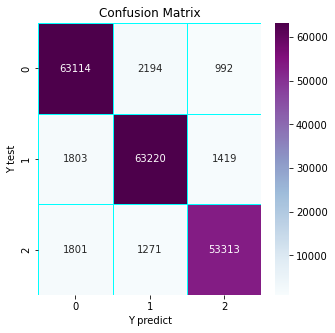

In [45]:
evaluation_metrics(Y_test, preds)

# Load Type

In [64]:
SeaTemp='SW20'
WindSpeed='WC0'
df_temp=df1[df1['SeaTemp']==SeaTemp]
df_temp=df_temp[df_temp['WindSpeed']==WindSpeed]
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_train=result[abr_sensor_list+['target','Load']]
df_train.dropna(inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,Load
0,16.77220,432.731,3647.98,16.53200,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,324.319,-1.34235,46.6942,48.6335,234.325,12.9326,14.9730,22.5361,0,FAL
1,16.77220,430.479,3647.98,16.53200,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,324.319,-1.34641,46.6710,48.6335,234.329,12.9326,14.9747,22.5361,0,FAL
2,16.77220,428.228,3647.98,16.53200,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,324.319,-1.35046,46.6477,48.6335,234.333,12.9326,14.9764,22.5361,0,FAL
3,16.77160,427.804,3647.98,16.53150,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,324.310,-1.35320,46.6519,48.6335,234.339,12.9326,14.9774,22.5357,0,FAL
4,16.77100,427.380,3647.98,16.53090,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,324.301,-1.35594,46.6560,48.6335,234.345,12.9326,14.9784,22.5354,0,FAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129971,8.47049,270.430,2683.40,9.45213,2.05788,2.83369,1.74808,69.7673,7.95029,2.15251,...,253.478,-51.53260,43.8587,47.5799,220.394,12.8403,12.7263,19.6532,2,FAU
129972,7.53458,269.205,2682.75,8.71584,1.96306,2.83378,1.60162,69.0624,7.97706,2.15274,...,253.342,-51.57610,43.8622,47.5793,220.394,12.8466,12.5993,19.5918,2,FAU
129973,6.59867,267.980,2682.11,7.97954,1.86824,2.83387,1.45517,68.3576,8.00383,2.15297,...,253.205,-51.61970,43.8658,47.5788,220.394,12.8528,12.4724,19.5303,2,FAU
129974,5.66276,266.755,2681.46,7.24325,1.77343,2.83396,1.30871,67.6528,8.03059,2.15320,...,253.068,-51.66320,43.8693,47.5782,220.394,12.8591,12.3454,19.4689,2,FAU


In [65]:
df_train.isna().sum()

E02005    0
E02006    0
E02056    0
E03760    0
G00027    0
G00108    0
G02011    0
N02015    0
P00023    0
P01005    0
P01302    0
P01303    0
P01600    0
P01602    0
P02055    0
P02065    0
P02066    0
P02071    0
P02072    0
Q02004    0
T00002    0
T01010    0
T01011    0
T01350    0
T01351    0
T01601    0
T01603    0
T02014    0
T02040    0
T02041    0
T02042    0
T02044    0
T04600    0
Z00518    0
Z01970    0
Z02013    0
target    0
Load      0
dtype: int64

In [66]:
SeaTemp='SW20'
WindSpeed='WC0'
df_temp=df2[df2['SeaTemp']==SeaTemp]
df_temp=df_temp[df_temp['WindSpeed']==WindSpeed]
result=df_temp
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_test=result[abr_sensor_list+['target','Load']]
df_test.dropna(inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,Load
0,16.77220,432.731,3647.98,16.53200,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,324.319,-1.34235,46.6942,48.6335,234.325,12.9326,14.9730,22.5361,0,FAL
1,16.77220,430.479,3647.98,16.53200,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,324.319,-1.34641,46.6710,48.6335,234.329,12.9326,14.9747,22.5361,0,FAL
2,16.77220,428.228,3647.98,16.53200,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,324.319,-1.35046,46.6477,48.6335,234.333,12.9326,14.9764,22.5361,0,FAL
3,16.77160,427.804,3647.98,16.53150,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,324.310,-1.35320,46.6519,48.6335,234.339,12.9326,14.9774,22.5357,0,FAL
4,16.77100,427.380,3647.98,16.53090,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,324.301,-1.35594,46.6560,48.6335,234.345,12.9326,14.9784,22.5354,0,FAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129971,8.47049,270.430,2683.40,9.45213,2.05788,2.83369,1.74808,69.7673,7.95029,2.15251,...,253.478,-51.53260,43.8587,47.5799,220.394,12.8403,12.7263,19.6532,2,FAU
129972,7.53458,269.205,2682.75,8.71584,1.96306,2.83378,1.60162,69.0624,7.97706,2.15274,...,253.342,-51.57610,43.8622,47.5793,220.394,12.8466,12.5993,19.5918,2,FAU
129973,6.59867,267.980,2682.11,7.97954,1.86824,2.83387,1.45517,68.3576,8.00383,2.15297,...,253.205,-51.61970,43.8658,47.5788,220.394,12.8528,12.4724,19.5303,2,FAU
129974,5.66276,266.755,2681.46,7.24325,1.77343,2.83396,1.30871,67.6528,8.03059,2.15320,...,253.068,-51.66320,43.8693,47.5782,220.394,12.8591,12.3454,19.4689,2,FAU


In [67]:
df_test.isna().sum()

E02005    0
E02006    0
E02056    0
E03760    0
G00027    0
G00108    0
G02011    0
N02015    0
P00023    0
P01005    0
P01302    0
P01303    0
P01600    0
P01602    0
P02055    0
P02065    0
P02066    0
P02071    0
P02072    0
Q02004    0
T00002    0
T01010    0
T01011    0
T01350    0
T01351    0
T01601    0
T01603    0
T02014    0
T02040    0
T02041    0
T02042    0
T02044    0
T04600    0
Z00518    0
Z01970    0
Z02013    0
target    0
Load      0
dtype: int64

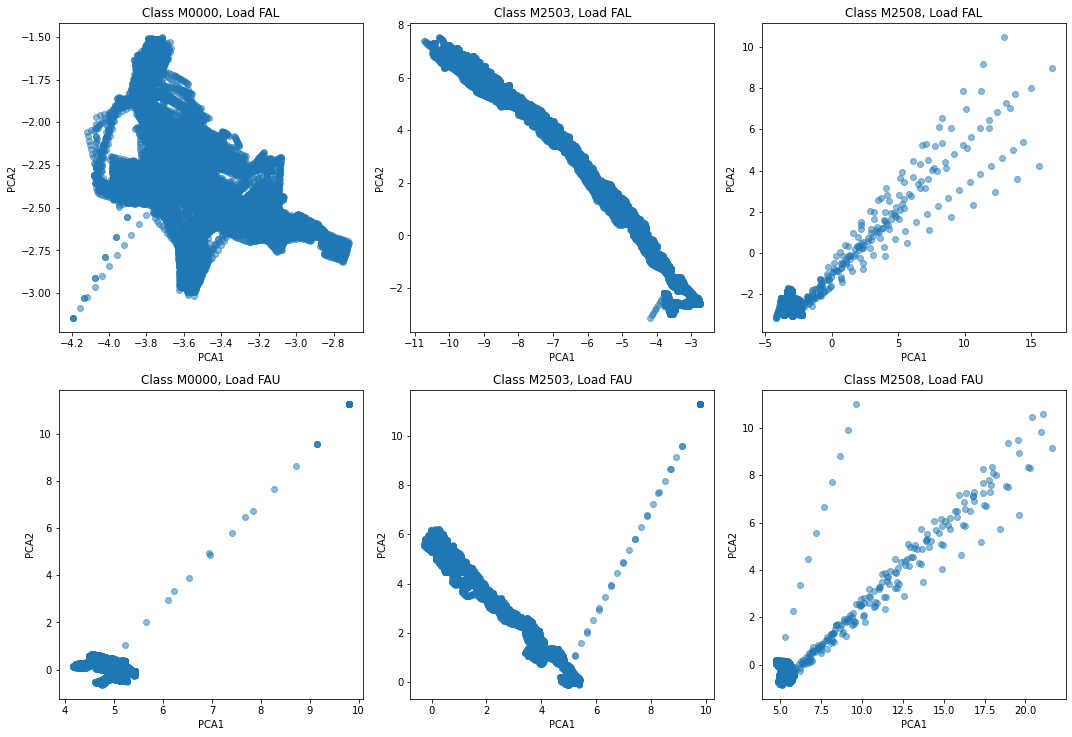

In [68]:
X = df_train[abr_sensor_list]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Add the class labels and temperature to the DataFrame
df_pca['target'] = df_train['target']
df_pca['Load'] = df_train['Load']
# assuming your DataFrame is called df and the class column is 'class_label', tempeture column is 'tempeture'
class_labels = df_train['target'].unique()
temp_values = df_train['Load'].unique()

# Create a subplot for each combination of class label and temperature
fig_count = 1
plt.figure(figsize=(15,15))
for temp in temp_values:
    for label in class_labels:
        plt.subplot(3,3,fig_count)
        temp_class_df = df_pca[(df_pca['target'] == label) & (df_pca['Load'] == temp)]
        plt.scatter(temp_class_df['PCA1'], temp_class_df['PCA2'], alpha=0.5)
        plt.title(f'Class {class_mapping.get(label)}, Load {temp}')
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        fig_count += 1
plt.tight_layout()
plt.show()


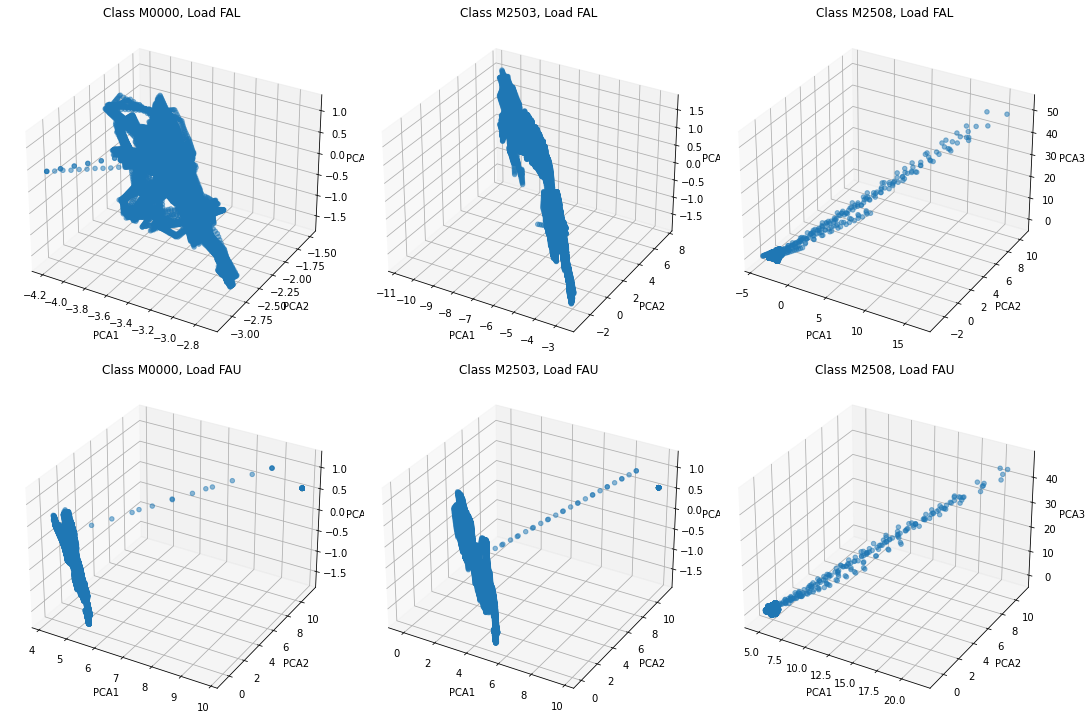

In [69]:
# Define the features
X = df_train[abr_sensor_list]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Initialize PCA
pca = PCA(n_components=3)

# Fit and transform the data to PCA
X_pca = pca.fit_transform(scaled_features)

# Create a new DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Add the class labels and wind speed to the DataFrame
df_pca['target'] = df_train['target']
df_pca['Load'] = df_train['Load']

# Create a figure for the plots
fig = plt.figure(figsize=(15,15))

# For each combination of class and wind speed, create a new 3D subplot
for i, (temp, label) in enumerate(itertools.product(temp_values, class_labels)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    temp_class_df = df_pca[(df_pca['target'] == label) & (df_pca['Load'] == temp)]
    ax.scatter(temp_class_df['PCA1'], temp_class_df['PCA2'], temp_class_df['PCA3'], alpha=0.5)
    ax.set_title(f'Class {class_mapping.get(label)}, Load {temp}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.tight_layout()
plt.show()


**One-Hot Encoder**

In [70]:
df_train_dummy = pd.get_dummies(df_train, columns=['Load'])
df_test_dummy = pd.get_dummies(df_test, columns=['Load'])

In [71]:
df_train_dummy

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,Load_FAL,Load_FAU
0,16.77220,432.731,3647.98,16.53200,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,-1.34235,46.6942,48.6335,234.325,12.9326,14.9730,22.5361,0,1,0
1,16.77220,430.479,3647.98,16.53200,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,-1.34641,46.6710,48.6335,234.329,12.9326,14.9747,22.5361,0,1,0
2,16.77220,428.228,3647.98,16.53200,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,-1.35046,46.6477,48.6335,234.333,12.9326,14.9764,22.5361,0,1,0
3,16.77160,427.804,3647.98,16.53150,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,-1.35320,46.6519,48.6335,234.339,12.9326,14.9774,22.5357,0,1,0
4,16.77100,427.380,3647.98,16.53090,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,-1.35594,46.6560,48.6335,234.345,12.9326,14.9784,22.5354,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129971,8.47049,270.430,2683.40,9.45213,2.05788,2.83369,1.74808,69.7673,7.95029,2.15251,...,-51.53260,43.8587,47.5799,220.394,12.8403,12.7263,19.6532,2,0,1
129972,7.53458,269.205,2682.75,8.71584,1.96306,2.83378,1.60162,69.0624,7.97706,2.15274,...,-51.57610,43.8622,47.5793,220.394,12.8466,12.5993,19.5918,2,0,1
129973,6.59867,267.980,2682.11,7.97954,1.86824,2.83387,1.45517,68.3576,8.00383,2.15297,...,-51.61970,43.8658,47.5788,220.394,12.8528,12.4724,19.5303,2,0,1
129974,5.66276,266.755,2681.46,7.24325,1.77343,2.83396,1.30871,67.6528,8.03059,2.15320,...,-51.66320,43.8693,47.5782,220.394,12.8591,12.3454,19.4689,2,0,1


In [72]:
# Train split
X_train = df_train_dummy.drop('target', axis = 1) # Features
Y_train = df_train_dummy['target']  # Target

In [73]:
# Test split
X_test = df_test_dummy.drop('target', axis = 1) # Features
Y_test = df_test_dummy['target']  # Target

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 98.87


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     44946
           1       0.99      0.99      0.99     44468
           2       0.99      0.99      0.99     40562

    accuracy                           0.99    129976
   macro avg       0.99      0.99      0.99    129976
weighted avg       0.99      0.99      0.99    129976

F1 Score:  0.9886563786389307


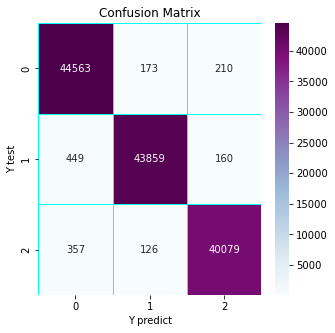

In [76]:
evaluation_metrics(Y_test, preds)

**Frequency Encoding**

In [77]:
df_train_frequency=df_train.copy()
fe = df_train_frequency.groupby('Load').size()/len(df_train_frequency)
df_train_frequency.loc[:, 'Load'] = df_train_frequency['Load'].map(fe)
df_test_frequency=df_test.copy()
fe = df_test_frequency.groupby('Load').size()/len(df_test_frequency)
df_test_frequency.loc[:, 'Load'] = df_test_frequency['Load'].map(fe)

In [78]:
df_train_frequency

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,Load
0,16.77220,432.731,3647.98,16.53200,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,324.319,-1.34235,46.6942,48.6335,234.325,12.9326,14.9730,22.5361,0,0.511779
1,16.77220,430.479,3647.98,16.53200,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,324.319,-1.34641,46.6710,48.6335,234.329,12.9326,14.9747,22.5361,0,0.511779
2,16.77220,428.228,3647.98,16.53200,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,324.319,-1.35046,46.6477,48.6335,234.333,12.9326,14.9764,22.5361,0,0.511779
3,16.77160,427.804,3647.98,16.53150,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,324.310,-1.35320,46.6519,48.6335,234.339,12.9326,14.9774,22.5357,0,0.511779
4,16.77100,427.380,3647.98,16.53090,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,324.301,-1.35594,46.6560,48.6335,234.345,12.9326,14.9784,22.5354,0,0.511779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129971,8.47049,270.430,2683.40,9.45213,2.05788,2.83369,1.74808,69.7673,7.95029,2.15251,...,253.478,-51.53260,43.8587,47.5799,220.394,12.8403,12.7263,19.6532,2,0.488221
129972,7.53458,269.205,2682.75,8.71584,1.96306,2.83378,1.60162,69.0624,7.97706,2.15274,...,253.342,-51.57610,43.8622,47.5793,220.394,12.8466,12.5993,19.5918,2,0.488221
129973,6.59867,267.980,2682.11,7.97954,1.86824,2.83387,1.45517,68.3576,8.00383,2.15297,...,253.205,-51.61970,43.8658,47.5788,220.394,12.8528,12.4724,19.5303,2,0.488221
129974,5.66276,266.755,2681.46,7.24325,1.77343,2.83396,1.30871,67.6528,8.03059,2.15320,...,253.068,-51.66320,43.8693,47.5782,220.394,12.8591,12.3454,19.4689,2,0.488221


In [79]:
# Train split
X_train = df_train_frequency.drop('target', axis = 1) # Features
Y_train = df_train_frequency['target']  # Target

In [80]:
# Test split
X_test = df_test_frequency.drop('target', axis = 1) # Features
Y_test = df_test_frequency['target']  # Target

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 98.88


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     44946
           1       0.99      0.99      0.99     44468
           2       0.99      0.99      0.99     40562

    accuracy                           0.99    129976
   macro avg       0.99      0.99      0.99    129976
weighted avg       0.99      0.99      0.99    129976

F1 Score:  0.9887777917114325


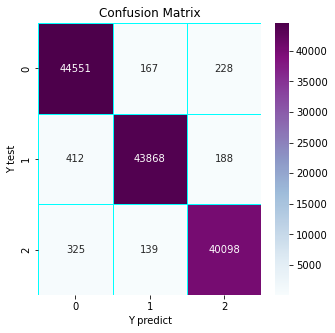

In [83]:
evaluation_metrics(Y_test, preds)

# ALL

In [84]:
result=df1
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_train=result[abr_sensor_list+['target','SeaTemp','WindSpeed','Load']]
df_train.dropna(inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp,WindSpeed,Load
0,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
1,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
2,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
3,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
4,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235791,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,57.9392,51.1324,300.477,16.0775,15.7389,31.6045,2,SW28,WC6,FAU
2235792,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,57.9217,51.1321,300.439,16.0790,15.7460,31.6222,2,SW28,WC6,FAU
2235793,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,57.9041,51.1318,300.400,16.0804,15.7530,31.6398,2,SW28,WC6,FAU
2235794,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,57.8865,51.1315,300.361,16.0819,15.7601,31.6574,2,SW28,WC6,FAU


In [85]:
df_train.isna().sum()

E02005       0
E02006       0
E02056       0
E03760       0
G00027       0
G00108       0
G02011       0
N02015       0
P00023       0
P01005       0
P01302       0
P01303       0
P01600       0
P01602       0
P02055       0
P02065       0
P02066       0
P02071       0
P02072       0
Q02004       0
T00002       0
T01010       0
T01011       0
T01350       0
T01351       0
T01601       0
T01603       0
T02014       0
T02040       0
T02041       0
T02042       0
T02044       0
T04600       0
Z00518       0
Z01970       0
Z02013       0
target       0
SeaTemp      0
WindSpeed    0
Load         0
dtype: int64

In [86]:
result=df2
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_test=result[abr_sensor_list+['target','SeaTemp','WindSpeed','Load']]
df_test.dropna(inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp,WindSpeed,Load
0,16.7722,432.7310,3647.98,16.5320,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,46.6942,48.6335,234.325,12.9326,14.9730,22.5361,0,SW20,WC0,FAL
1,16.7722,430.4790,3647.98,16.5320,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,46.6710,48.6335,234.329,12.9326,14.9747,22.5361,0,SW20,WC0,FAL
2,16.7722,428.2280,3647.98,16.5320,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,46.6477,48.6335,234.333,12.9326,14.9764,22.5361,0,SW20,WC0,FAL
3,16.7716,427.8040,3647.98,16.5315,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,46.6519,48.6335,234.339,12.9326,14.9774,22.5357,0,SW20,WC0,FAL
4,16.7710,427.3800,3647.98,16.5309,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,46.6560,48.6335,234.345,12.9326,14.9784,22.5354,0,SW20,WC0,FAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152217,12.2713,24.8041,2854.77,11.3117,2.84142,3.10566,2.84066,66.2408,7.74033,2.15153,...,57.6937,51.1340,302.676,16.2002,15.8048,32.3668,2,SW28,WC6,FAU
1152218,12.2393,24.7914,2854.77,11.1414,2.83280,3.10399,2.83242,66.1479,7.74267,2.15147,...,57.7131,51.1328,302.657,16.1980,15.8072,32.1289,2,SW28,WC6,FAU
1152219,12.2073,24.7788,2854.77,10.9711,2.82417,3.10231,2.82417,66.0550,7.74500,2.15141,...,57.7326,51.1315,302.638,16.1958,15.8096,31.8910,2,SW28,WC6,FAU
1152220,12.4152,24.9221,2854.77,12.1801,2.86838,3.09923,2.86838,67.0868,7.73741,2.15215,...,57.7077,51.1315,302.622,16.1937,15.8288,31.8499,2,SW28,WC6,FAU


In [87]:
df_test.isna().sum()

E02005       0
E02006       0
E02056       0
E03760       0
G00027       0
G00108       0
G02011       0
N02015       0
P00023       0
P01005       0
P01302       0
P01303       0
P01600       0
P01602       0
P02055       0
P02065       0
P02066       0
P02071       0
P02072       0
Q02004       0
T00002       0
T01010       0
T01011       0
T01350       0
T01351       0
T01601       0
T01603       0
T02014       0
T02040       0
T02041       0
T02042       0
T02044       0
T04600       0
Z00518       0
Z01970       0
Z02013       0
target       0
SeaTemp      0
WindSpeed    0
Load         0
dtype: int64

**One-Hot Encoder**

In [88]:
df_train_dummy = pd.get_dummies(df_train, columns=['SeaTemp','WindSpeed','Load'])
df_test_dummy = pd.get_dummies(df_test, columns=['SeaTemp','WindSpeed','Load'])

In [89]:
df_train_dummy

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,Z02013,target,SeaTemp_SW20,SeaTemp_SW25,SeaTemp_SW28,WindSpeed_WC0,WindSpeed_WC4,WindSpeed_WC6,Load_FAL,Load_FAU
0,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,22.5320,0,1,0,0,1,0,0,1,0
1,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,22.5320,0,1,0,0,1,0,0,1,0
2,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,22.5320,0,1,0,0,1,0,0,1,0
3,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,22.5320,0,1,0,0,1,0,0,1,0
4,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,22.5320,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235791,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,31.6045,2,0,0,1,0,0,1,0,1
2235792,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,31.6222,2,0,0,1,0,0,1,0,1
2235793,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,31.6398,2,0,0,1,0,0,1,0,1
2235794,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,31.6574,2,0,0,1,0,0,1,0,1


In [90]:
# Train split
X_train = df_train_dummy.drop('target', axis = 1) # Features
Y_train = df_train_dummy['target']  # Target

In [91]:
# Test split
X_test = df_test_dummy.drop('target', axis = 1) # Features
Y_test = df_test_dummy['target']  # Target

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 94.63


              precision    recall  f1-score   support

           0       0.93      0.96      0.94    400551
           1       0.94      0.95      0.94    390795
           2       0.97      0.94      0.95    360876

    accuracy                           0.95   1152222
   macro avg       0.95      0.95      0.95   1152222
weighted avg       0.95      0.95      0.95   1152222

F1 Score:  0.9463361797062375


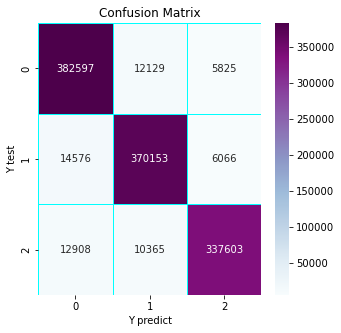

In [94]:
evaluation_metrics(Y_test, preds)

**Frequency Encoding**

In [95]:
df_train_frequency=df_train.copy()
Load_fe = df_train_frequency.groupby('Load').size()/len(df_train_frequency)
WindSpeed_fe = df_train_frequency.groupby('WindSpeed').size()/len(df_train_frequency)
SeaTemp_fe = df_train_frequency.groupby('SeaTemp').size()/len(df_train_frequency)
df_train_frequency.loc[:, 'Load'] = df_train_frequency['Load'].map(Load_fe)
df_train_frequency.loc[:, 'WindSpeed'] = df_train_frequency['WindSpeed'].map(WindSpeed_fe)
df_train_frequency.loc[:, 'SeaTemp'] = df_train_frequency['SeaTemp'].map(SeaTemp_fe)
df_test_frequency=df_test.copy()
Load_fe = df_test_frequency.groupby('Load').size()/len(df_test_frequency)
WindSpeed_fe = df_test_frequency.groupby('WindSpeed').size()/len(df_test_frequency)
SeaTemp_fe = df_test_frequency.groupby('SeaTemp').size()/len(df_test_frequency)
df_test_frequency.loc[:, 'Load'] = df_test_frequency['Load'].map(Load_fe)
df_test_frequency.loc[:, 'WindSpeed'] = df_test_frequency['WindSpeed'].map(WindSpeed_fe)
df_test_frequency.loc[:, 'SeaTemp'] = df_test_frequency['SeaTemp'].map(SeaTemp_fe)

In [96]:
df_train_frequency

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp,WindSpeed,Load
0,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,0.503727
1,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,0.503727
2,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,0.503727
3,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,0.503727
4,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,0.503727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235791,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,57.9392,51.1324,300.477,16.0775,15.7389,31.6045,2,0.33866,0.336879,0.496273
2235792,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,57.9217,51.1321,300.439,16.0790,15.7460,31.6222,2,0.33866,0.336879,0.496273
2235793,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,57.9041,51.1318,300.400,16.0804,15.7530,31.6398,2,0.33866,0.336879,0.496273
2235794,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,57.8865,51.1315,300.361,16.0819,15.7601,31.6574,2,0.33866,0.336879,0.496273


In [97]:
df_train

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02042,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp,WindSpeed,Load
0,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
1,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
2,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
3,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
4,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0,SW20,WC0,FAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235791,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,57.9392,51.1324,300.477,16.0775,15.7389,31.6045,2,SW28,WC6,FAU
2235792,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,57.9217,51.1321,300.439,16.0790,15.7460,31.6222,2,SW28,WC6,FAU
2235793,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,57.9041,51.1318,300.400,16.0804,15.7530,31.6398,2,SW28,WC6,FAU
2235794,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,57.8865,51.1315,300.361,16.0819,15.7601,31.6574,2,SW28,WC6,FAU


In [98]:
# Train split
X_train = df_train_frequency.drop('target', axis = 1) # Features
Y_train = df_train_frequency['target']  # Target

In [99]:
# Test split
X_test = df_test_frequency.drop('target', axis = 1) # Features
Y_test = df_test_frequency['target']  # Target

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 94.66


              precision    recall  f1-score   support

           0       0.93      0.96      0.94    400551
           1       0.94      0.95      0.95    390795
           2       0.97      0.93      0.95    360876

    accuracy                           0.95   1152222
   macro avg       0.95      0.95      0.95   1152222
weighted avg       0.95      0.95      0.95   1152222

F1 Score:  0.9465991020084493


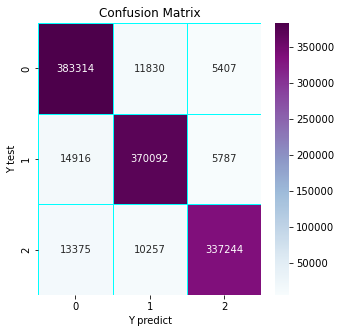

In [102]:
evaluation_metrics(Y_test, preds)

**Mix**

In [103]:
df_train_frequency=df_train.copy()
WindSpeed_fe = df_train_frequency.groupby('WindSpeed').size()/len(df_train_frequency)
SeaTemp_fe = df_train_frequency.groupby('SeaTemp').size()/len(df_train_frequency)
df_train_frequency.loc[:, 'WindSpeed'] = df_train_frequency['WindSpeed'].map(WindSpeed_fe)
df_train_frequency.loc[:, 'SeaTemp'] = df_train_frequency['SeaTemp'].map(SeaTemp_fe)
df_test_frequency=df_test.copy()
WindSpeed_fe = df_test_frequency.groupby('WindSpeed').size()/len(df_test_frequency)
SeaTemp_fe = df_test_frequency.groupby('SeaTemp').size()/len(df_test_frequency)
df_test_frequency.loc[:, 'WindSpeed'] = df_test_frequency['WindSpeed'].map(WindSpeed_fe)
df_test_frequency.loc[:, 'SeaTemp'] = df_test_frequency['SeaTemp'].map(SeaTemp_fe)

In [104]:
df_train_mix = pd.get_dummies(df_train_frequency, columns=['Load'])
df_test_mix = pd.get_dummies(df_test_frequency, columns=['Load'])

In [105]:
df_train_mix

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02044,T04600,Z00518,Z01970,Z02013,target,SeaTemp,WindSpeed,Load_FAL,Load_FAU
0,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,1,0
1,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,1,0
2,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,1,0
3,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,1,0
4,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,48.6324,234.325,12.9311,14.9813,22.5320,0,0.33381,0.330756,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235791,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,51.1324,300.477,16.0775,15.7389,31.6045,2,0.33866,0.336879,0,1
2235792,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,51.1321,300.439,16.0790,15.7460,31.6222,2,0.33866,0.336879,0,1
2235793,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,51.1318,300.400,16.0804,15.7530,31.6398,2,0.33866,0.336879,0,1
2235794,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,51.1315,300.361,16.0819,15.7601,31.6574,2,0.33866,0.336879,0,1


In [106]:
# Train split
X_train = df_train_mix.drop('target', axis = 1) # Features
Y_train = df_train_mix['target']  # Target

In [107]:
# Test split
X_test = df_test_mix.drop('target', axis = 1) # Features
Y_test = df_test_mix['target']  # Target

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 94.62


              precision    recall  f1-score   support

           0       0.93      0.96      0.94    400551
           1       0.94      0.95      0.94    390795
           2       0.97      0.93      0.95    360876

    accuracy                           0.95   1152222
   macro avg       0.95      0.95      0.95   1152222
weighted avg       0.95      0.95      0.95   1152222

F1 Score:  0.9462252800478671


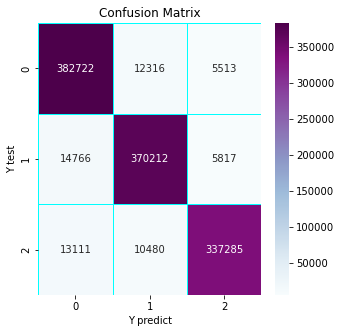

In [110]:
evaluation_metrics(Y_test, preds)

#  No Conditions

In [111]:
result=df1
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_train=result[abr_sensor_list+['target']]
df_train.dropna(inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target
0,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,325.643,324.319,-1.31793,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0
1,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,325.643,324.319,-1.31793,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0
2,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,325.643,324.319,-1.31793,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0
3,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,325.643,324.319,-1.31793,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0
4,16.7659,430.9120,3647.98,16.5258,3.17649,3.43147,3.17649,74.0058,7.63919,2.15155,...,325.643,324.319,-1.31793,46.7306,48.6324,234.325,12.9311,14.9813,22.5320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235791,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,413.021,371.033,-41.97550,57.9392,51.1324,300.477,16.0775,15.7389,31.6045,2
2235792,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,413.003,371.015,-41.97420,57.9217,51.1321,300.439,16.0790,15.7460,31.6222,2
2235793,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,412.986,370.997,-41.97280,57.9041,51.1318,300.400,16.0804,15.7530,31.6398,2
2235794,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,412.968,370.979,-41.97140,57.8865,51.1315,300.361,16.0819,15.7601,31.6574,2


In [112]:
df_train.isna().sum()

E02005    0
E02006    0
E02056    0
E03760    0
G00027    0
G00108    0
G02011    0
N02015    0
P00023    0
P01005    0
P01302    0
P01303    0
P01600    0
P01602    0
P02055    0
P02065    0
P02066    0
P02071    0
P02072    0
Q02004    0
T00002    0
T01010    0
T01011    0
T01350    0
T01351    0
T01601    0
T01603    0
T02014    0
T02040    0
T02041    0
T02042    0
T02044    0
T04600    0
Z00518    0
Z01970    0
Z02013    0
target    0
dtype: int64

In [113]:
result=df2
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_test=result[abr_sensor_list+['target']]
df_test.dropna(inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test

C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013,target
0,16.7722,432.7310,3647.98,16.5320,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,325.669,324.319,-1.34235,46.6942,48.6335,234.325,12.9326,14.9730,22.5361,0
1,16.7722,430.4790,3647.98,16.5320,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,325.669,324.319,-1.34641,46.6710,48.6335,234.329,12.9326,14.9747,22.5361,0
2,16.7722,428.2280,3647.98,16.5320,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,325.669,324.319,-1.35046,46.6477,48.6335,234.333,12.9326,14.9764,22.5361,0
3,16.7716,427.8040,3647.98,16.5315,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,325.664,324.310,-1.35320,46.6519,48.6335,234.339,12.9326,14.9774,22.5357,0
4,16.7710,427.3800,3647.98,16.5309,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,325.659,324.301,-1.35594,46.6560,48.6335,234.345,12.9326,14.9784,22.5354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152217,12.2713,24.8041,2854.77,11.3117,2.84142,3.10566,2.84066,66.2408,7.74033,2.15153,...,413.553,371.676,-41.84750,57.6937,51.1340,302.676,16.2002,15.8048,32.3668,2
1152218,12.2393,24.7914,2854.77,11.1414,2.83280,3.10399,2.83242,66.1479,7.74267,2.15147,...,413.531,371.655,-41.86130,57.7131,51.1328,302.657,16.1980,15.8072,32.1289,2
1152219,12.2073,24.7788,2854.77,10.9711,2.82417,3.10231,2.82417,66.0550,7.74500,2.15141,...,413.509,371.634,-41.87520,57.7326,51.1315,302.638,16.1958,15.8096,31.8910,2
1152220,12.4152,24.9221,2854.77,12.1801,2.86838,3.09923,2.86838,67.0868,7.73741,2.15215,...,413.542,371.703,-41.83910,57.7077,51.1315,302.622,16.1937,15.8288,31.8499,2


In [114]:
df_test.isna().sum()

E02005    0
E02006    0
E02056    0
E03760    0
G00027    0
G00108    0
G02011    0
N02015    0
P00023    0
P01005    0
P01302    0
P01303    0
P01600    0
P01602    0
P02055    0
P02065    0
P02066    0
P02071    0
P02072    0
Q02004    0
T00002    0
T01010    0
T01011    0
T01350    0
T01351    0
T01601    0
T01603    0
T02014    0
T02040    0
T02041    0
T02042    0
T02044    0
T04600    0
Z00518    0
Z01970    0
Z02013    0
target    0
dtype: int64

In [115]:
# Train split
X_train = df_train.drop('target', axis = 1) # Features
Y_train = df_train['target']  # Target

In [116]:
# Test split
X_test = df_test.drop('target', axis = 1) # Features
Y_test = df_test['target']  # Target

In [117]:
# Data normalization for KNN and Pca
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
#Use these in your XGBoost model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2, subsample=0.5, colsample_bytree=0.8)

# Train the model
xgb.fit(X_train_scaled, Y_train)

# Predict the test data
preds = xgb.predict(X_test_scaled)

# Calculate the accuracy of the model
acc_xgb = (preds == Y_test).sum().astype(float) / len(preds)*100

# Print the accuracy
print("XGBoost's prediction accuracy with optimized parameters is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy with optimized parameters is: 94.62


              precision    recall  f1-score   support

           0       0.93      0.96      0.94    400551
           1       0.94      0.95      0.94    390795
           2       0.97      0.93      0.95    360876

    accuracy                           0.95   1152222
   macro avg       0.95      0.95      0.95   1152222
weighted avg       0.95      0.95      0.95   1152222

F1 Score:  0.9462024518040343


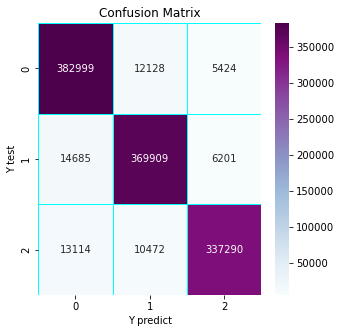

In [119]:
evaluation_metrics(Y_test, preds)

# Result

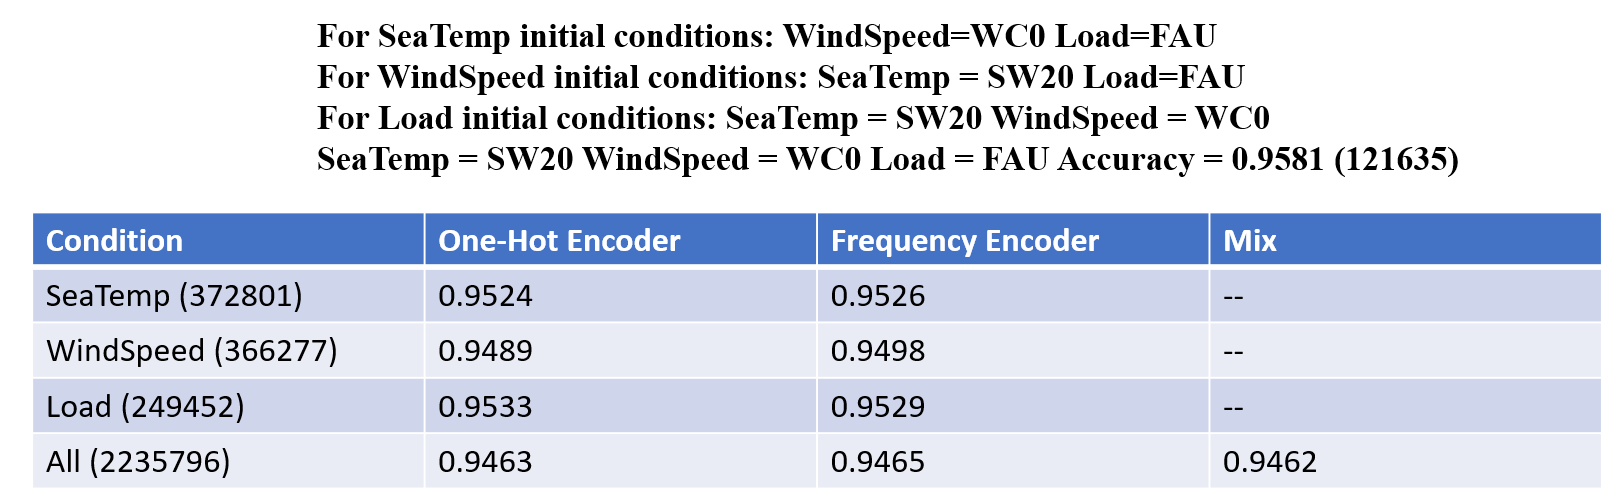

In [ ]:
df_test=df1['Load'].unique()
df_test

In [ ]:
df_test=pd.DataFrame(df_test,columns=['z'])
df_test

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['LabelEncoder'] = le.fit_transform(df_test['z'])
df_test

In [ ]:
df_test['original_z'] = df_test['z']
df_test = pd.get_dummies(df_test, columns=['z'])
df_test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_test['OrdinalEncoder'] = ord_enc.fit_transform(df_test[['original_z']])
df_test

In [ ]:
import category_encoders as ce
df_test['z'] = df_test['original_z']
bin_enc = ce.BinaryEncoder(cols=['original_z'])
df_test = bin_enc.fit_transform(df_test)
df_test

In [ ]:
fe = df_test.groupby('z').size()/len(df_test)
df_test.loc[:, 'z'] = df_test['z'].map(fe)

In [ ]:
df_test